In [ ]:
%matplotlib inline
from vic.dataloader import load_orl, make_fixed_test_indices, split_with_fixed_test
from vic.models import LBPH
from vic.metrics import get_metrics_vs_train_size_joblib
from vic.transform import transform_test_set
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
def make_lbph():
    return LBPH()

In [3]:
data = load_orl("../data/ORL")
max_idx = max(data.keys())
min_length = min(len(images) for images in data.values())
print(
    f"Loaded ORL dataset with {max_idx} subjects with at least {min_length} images each."
)

Loaded ORL dataset with 40 subjects with at least 10 images each.


In [12]:
model = LBPH()
n_test = 3
train_sizes = np.arange(1, min_length - n_test + 1)
test_idx, pool_idx = make_fixed_test_indices(data, n_test=n_test, seed=0)

In [19]:
angles = [0, 15, 20, 30, 45]
results_rotate = {}
for angle in angles:
    new_data, new_test_idx = transform_test_set(
        data, test_idx, operation="rotate", angle=angle
    )
    accuracy_scores, _ = get_metrics_vs_train_size_joblib(
        make_lbph, train_sizes, new_data, new_test_idx, pool_idx, seed=0, n_jobs=4
    )
    results_rotate[angle] = accuracy_scores

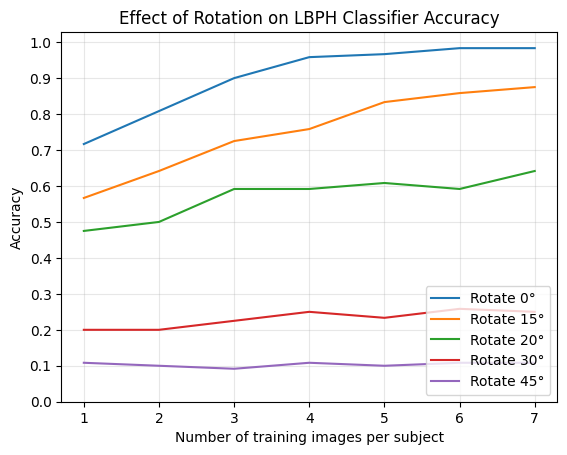

In [24]:
fig = plt.figure()

for angle, scores in results_rotate.items():
    scores = [scores[ts] for ts in train_sizes]
    plt.plot(train_sizes, scores, label=f"Rotate {angle}°")

plt.xlabel("Number of training images per subject")
plt.ylabel("Accuracy")
plt.title("Effect of Rotation on LBPH Classifier Accuracy")
plt.grid(True, alpha=0.3)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(loc="lower right")
plt.show()

In [13]:
noise_stds = [0, 1, 5, 10, 20]
results_noise = {}
for std in noise_stds:
    new_data, new_test_idx = transform_test_set(
        data, test_idx, operation="noise", noise_std=std
    )
    accuracy_scores, _ = get_metrics_vs_train_size_joblib(
        make_lbph, train_sizes, new_data, new_test_idx, pool_idx, seed=0, n_jobs=4
    )
    results_noise[std] = accuracy_scores

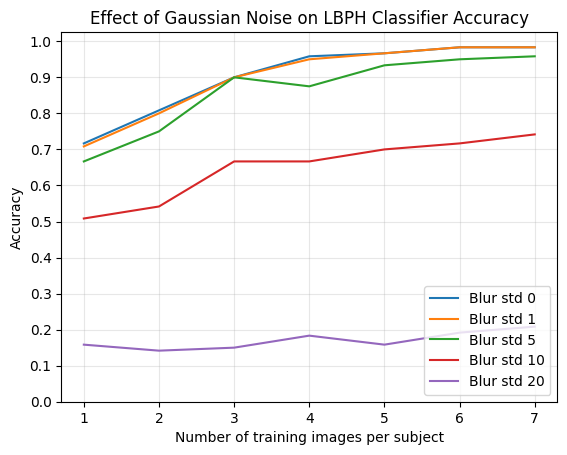

In [14]:
fig = plt.figure()

for noise_std, scores in results_noise.items():
    scores = [scores[ts] for ts in train_sizes]
    plt.plot(train_sizes, scores, label=f"Blur std {noise_std}")

plt.xlabel("Number of training images per subject")
plt.ylabel("Accuracy")
plt.title("Effect of Gaussian Noise on LBPH Classifier Accuracy")
plt.grid(True, alpha=0.3)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(loc="lower right")
plt.show()

In [15]:
blur_stds = [0, 1, 3, 5, 7]
results_blur = {}
for std in blur_stds:
    new_data, new_test_idx = transform_test_set(
        data, test_idx, operation="blur", blur_std=std
    )
    accuracy_scores, _ = get_metrics_vs_train_size_joblib(
        make_lbph, train_sizes, new_data, new_test_idx, pool_idx, seed=0, n_jobs=4
    )
    results_blur[std] = accuracy_scores

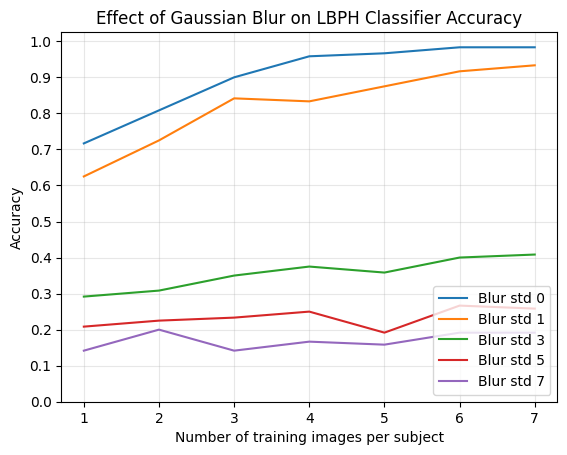

In [16]:
fig = plt.figure()

for blur_std, scores in results_blur.items():
    scores = [scores[ts] for ts in train_sizes]
    plt.plot(train_sizes, scores, label=f"Blur std {blur_std}")

plt.xlabel("Number of training images per subject")
plt.ylabel("Accuracy")
plt.title("Effect of Gaussian Blur on LBPH Classifier Accuracy")
plt.grid(True, alpha=0.3)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(loc="lower right")
plt.show()

In [20]:
flips = ["", "horizontal", "vertical"]
results_flip = {}
for flip_code in flips:
    new_data, new_test_idx = transform_test_set(
        data, test_idx, operation="flip", flip_direction=flip_code
    )
    accuracy_scores, _ = get_metrics_vs_train_size_joblib(
        make_lbph, train_sizes, new_data, new_test_idx, pool_idx, seed=0, n_jobs=4
    )
    results_flip[flip_code] = accuracy_scores

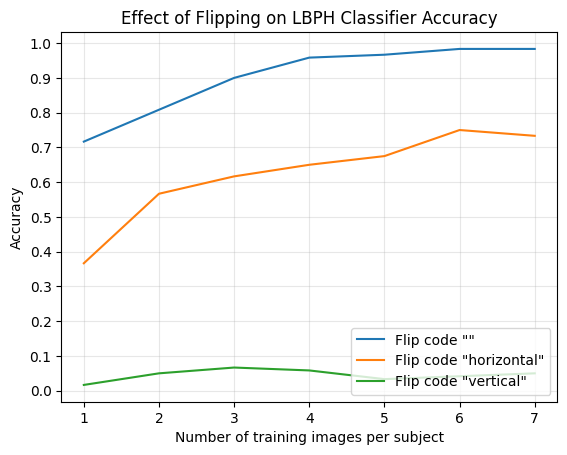

In [21]:
fig = plt.figure()

for flip_code, scores in results_flip.items():
    scores = [scores[ts] for ts in train_sizes]
    plt.plot(train_sizes, scores, label=f'Flip code "{flip_code}"')

plt.xlabel("Number of training images per subject")
plt.ylabel("Accuracy")
plt.title("Effect of Flipping on LBPH Classifier Accuracy")
plt.grid(True, alpha=0.3)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(loc="lower right")
plt.show()

In [22]:
brightness_factors = [0.1, 0.5, 1.0, 2.0, 5.0]
results_brightness = {}
for factor in brightness_factors:
    new_data, new_test_idx = transform_test_set(
        data, test_idx, operation="brightness", brightness_factor=factor
    )
    accuracy_scores, _ = get_metrics_vs_train_size_joblib(
        make_lbph, train_sizes, new_data, new_test_idx, pool_idx, seed=0, n_jobs=4
    )
    results_brightness[factor] = accuracy_scores

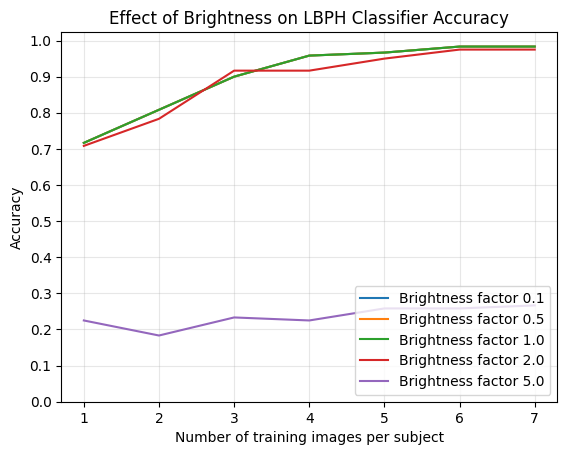

In [26]:
fig = plt.figure()

for factor, scores in results_brightness.items():
    scores = [scores[ts] for ts in train_sizes]
    plt.plot(train_sizes, scores, label=f"Brightness factor {factor}")

plt.xlabel("Number of training images per subject")
plt.ylabel("Accuracy")
plt.title("Effect of Brightness on LBPH Classifier Accuracy")
plt.grid(True, alpha=0.3)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(loc="lower right")
plt.show()